In [19]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [12]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [27]:
X_train = df_train.iloc[:,1:].values
X_test = df_test.iloc[:,1:].values
y_train = df_train.iloc[:,0].values
y_test = df_test.iloc[:,0].values

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [13]:
28 * 28

784

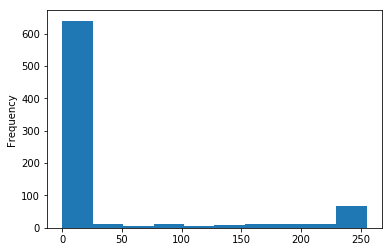

In [14]:
df_train.iloc[0,:].plot.hist()

In [15]:
df_train.iloc[0,:].describe()

count    785.000000
mean      35.070064
std       79.656078
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      255.000000
Name: 0, dtype: float64

Text(0.5, 1.0, '5')

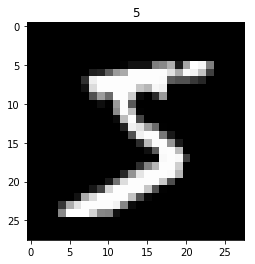

In [22]:
plt.imshow(df_train.iloc[0,1:].values.reshape((28,28)), cmap="gray")
plt.title(df_train.iloc[0,0])

In [30]:
X_train.flatten().shape

(47040000,)

In [31]:
a = X_train.flatten()
(a == 0).sum()/len(a)

0.8087977040816327

In [32]:
X_train = X_train/255

In [33]:
a = X_train.flatten()
(a == 0).sum()/len(a)

0.8087977040816327

In [34]:
X_train = df_train.iloc[:,1:].values/255
X_test = df_test.iloc[:,1:].values/255
y_train = df_train.iloc[:,0].values
y_test = df_test.iloc[:,0].values

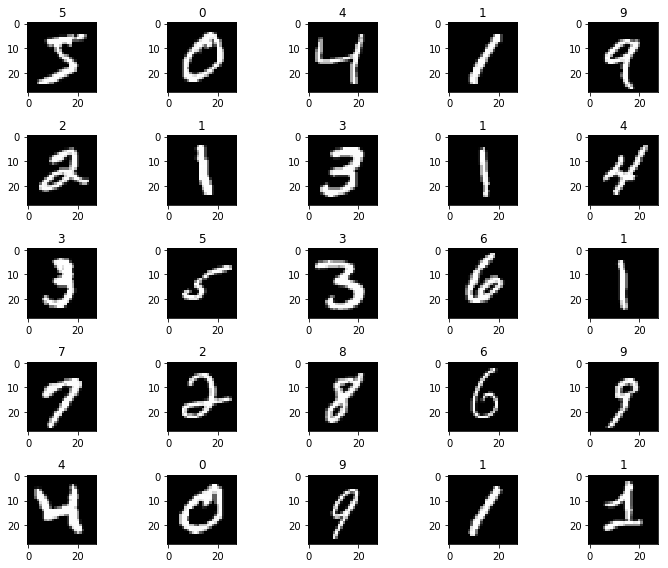

In [37]:
fig, axes = plt.subplots(5, 5, figsize = (10,8))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28,28)), cmap = "gray")
    ax.set_title(y_train[i])

plt.tight_layout()

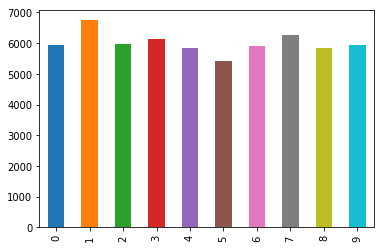

In [39]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

In [40]:
from sklearn import *

In [ ]:
%%time

est = linear_model.SGDClassifier(loss="log", eta0=0.01, random_state = 1
        , alpha=0.01, learning_rate="invscaling", tol = 1e-4
        , max_iter = 1000)

est.fit(X_train, y_train)
print("test accuracy", est.score(X_test, y_test))

In [ ]:
y_test_pred = est.predict(X_test)

In [ ]:
error = y_test != y_test_pred

In [ ]:
summary = pd.DataFrame({"actual": y_test
                      , "prediction": y_test_pred, "error": error})

summary.sample(10)

In [ ]:
import seaborn as sns

In [ ]:
a = summary[error]
a = a.pivot_table("error", "actual", "prediction", aggfunc = "sum")
sns.heatmap(a, cmap = sns.color_palette("Blues"), annot=True)